<a href="https://colab.research.google.com/github/joaofariastn/Projecao-populacional/blob/main/Artigo2_0E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_absolute_error
# Carregar o arquivo CSV e tratar valores nulos
df = pd.read_csv('/content/drive/MyDrive/Base dados/East asia e pacific.csv')


df.dropna(inplace=True)

# Converter a coluna 'Time' para o formato datetime e defini-la como índice
df['Time'] = pd.to_datetime(df['Time'], format='%Y')
df = df.set_index('Time')
data = df['Population growth (annual %) [SP.POP.GROW]'].resample('YS').first() # Assuming you want the first value of each year
data = np.log1p(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_size = int(len(data) * 0.95)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Função para otimizar parâmetros usando Random Search para SARIMAX
def random_search_sarimax(train_data, test_data, n_iter=30):
    best_score = float('inf')
    best_order = None
    best_seasonal_order = None

    for _ in range(n_iter):
        # Gerar valores aleatórios para p, d, q, P, D, Q, s (sazonalidade)
        p = random.randint(0, 5)
        d = random.randint(0, 2)
        q = random.randint(0, 5)
        P = random.randint(0, 2)
        D = random.randint(0, 1)
        Q = random.randint(0, 2)
        s = random.choice([0, 12])

        try:
            # Ajustar o modelo SARIMAX
            model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
            model_fit = model.fit(disp=False)

            # Fazer previsão
            forecast = model_fit.get_forecast(steps=len(test_data))
            predictions = forecast.predicted_mean

            # Calcular RMSE
            rmse = mean_squared_error(test_data, predictions, squared=False)
            mae = mean_absolute_error(test_data, predictions)
            print(f'MAE: {mae:.2f}')
            # Atualizar melhor combinação de parâmetros
            if rmse < best_score:
                best_score = rmse
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, s)

        except:
            # Ignorar combinações que falham
            continue

    return best_order, best_seasonal_order, best_score

# Otimizar os parâmetros
best_order, best_seasonal_order, best_score = random_search_sarimax(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    test_data['Population growth (annual %) [SP.POP.GROW]']
)
print(f"Melhor combinação de parâmetros: {best_order} e sazonalidade: {best_seasonal_order} com RMSE: {best_score:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 

MAE: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAE: 0.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few 

MAE: 0.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.43


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAE: 0.16


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.47


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.17


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.27


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-inv

MAE: 0.05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-inv

MAE: 0.36
MAE: 0.14
Melhor combinação de parâmetros: (4, 2, 3) e sazonalidade: (0, 1, 0, 12) com RMSE: 0.05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


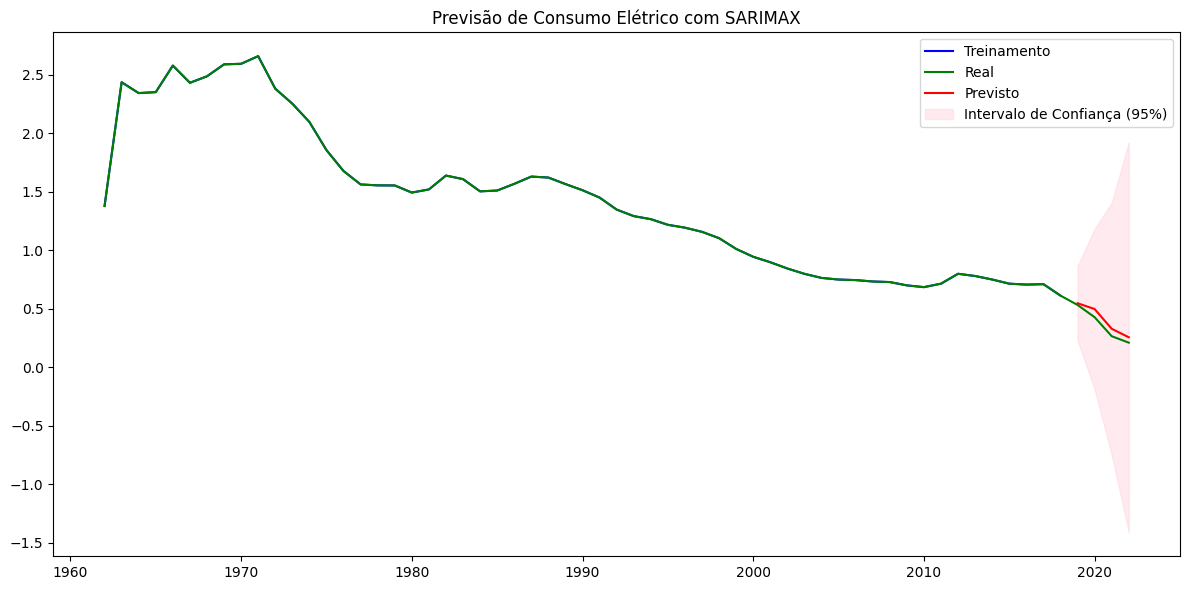

In [ ]:
model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()

# Fazer previsões sobre o conjunto de teste
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
predictions = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotar as previsões contra os valores reais
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Population growth (annual %) [SP.POP.GROW]'], label='Treinamento', color='blue')
plt.plot(df['Population growth (annual %) [SP.POP.GROW]'].index, df['Population growth (annual %) [SP.POP.GROW]'], label='Real', color='green')
plt.plot(test_data.index, predictions, label='Previsto', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança (95%)')
plt.legend()
plt.title('Previsão de Consumo Elétrico com SARIMAX')
plt.tight_layout()
plt.show()

In [ ]:
train_size = int(len(data))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


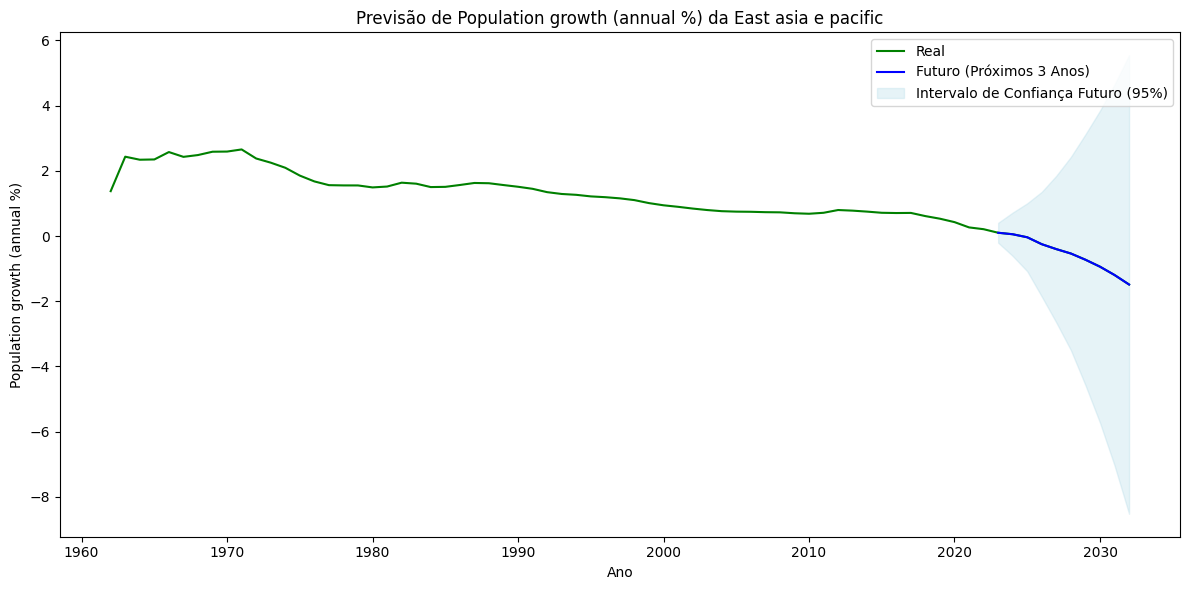

Previsões para os próximos 10 anos:
             Ano  Previsão  IC Inferior (95%)  IC Superior (95%)
2023-01-01  2023  0.101779          -0.202980           0.406538
2024-01-01  2024  0.055725          -0.608883           0.720333
2025-01-01  2025 -0.037190          -1.080168           1.005787
2026-01-01  2026 -0.249955          -1.858069           1.358160
2027-01-01  2027 -0.400524          -2.652527           1.851480
2028-01-01  2028 -0.535250          -3.499382           2.428883
2029-01-01  2029 -0.725969          -4.574086           3.122147
2030-01-01  2030 -0.939494          -5.726054           3.847065
2031-01-01  2031 -1.194557          -7.036124           4.647010
2032-01-01  2032 -1.486438          -8.519370           5.546495


In [ ]:
model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()



# Prever os próximos 3 anos
future_steps = 10
forecast_future = model_fit.get_forecast(steps=future_steps)
predictions_future = forecast_future.predicted_mean
conf_int_future = forecast_future.conf_int()

# Criar um índice de datas para os próximos 3 anos
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='YS-JAN')[1:]
future_dates
# Plotar as previsões contra os valores reais e futuros


# Plotar as previsões contra os valores reais e futuros
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Real', color='green')
plt.plot(future_dates, predictions_future, label='Futuro (Próximos 3 Anos)', color='blue')
plt.fill_between(future_dates, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confiança Futuro (95%)')
plt.legend()
plt.title('Previsão de Population growth (annual %) da East asia e pacific')
plt.xlabel('Ano')
plt.ylabel('Population growth (annual %)')
plt.tight_layout()
plt.show()

# Exibir as previsões futuras com intervalo de confiança
forecast_table = pd.DataFrame({
    'Ano': future_dates.year,
    'Previsão': predictions_future,
    'IC Inferior (95%)': conf_int_future.iloc[:, 0],
    'IC Superior (95%)': conf_int_future.iloc[:, 1]
})
print("Previsões para os próximos 10 anos:")
print(forecast_table)

In [ ]:
last_date


Timestamp('2022-01-01 00:00:00')

In [ ]:
future_dates

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01',
               '2031-01-01', '2032-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [ ]:
df

,Country Name,Country Code,Time Code,Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]"
Time,,,,,,
1962-01-01,East Asia & Pacific,EAS,YR1962,1.377452,1.059600e+09,10.856995
1963-01-01,East Asia & Pacific,EAS,YR1963,2.434757,1.085399e+09,10.770002
1964-01-01,East Asia & Pacific,EAS,YR1964,2.342030,1.110819e+09,11.561035
1965-01-01,East Asia & Pacific,EAS,YR1965,2.350317,1.136927e+09,10.674971
1966-01-01,East Asia & Pacific,EAS,YR1966,2.577178,1.166228e+09,9.801464
...,...,...,...,...,...,...
2018-01-01,East Asia & Pacific,EAS,YR2018,0.612373,2.341384e+09,7.222431
2019-01-01,East Asia & Pacific,EAS,YR2019,0.532727,2.353857e+09,7.253500
2020-01-01,East Asia & Pacific,EAS,YR2020,0.428126,2.363934e+09,7.383823


In [ ]:

predictions_future

,predicted_mean
2023-01-01,0.101779
2024-01-01,0.055725
2025-01-01,-0.037190
2026-01-01,-0.249955
2027-01-01,-0.400524
2028-01-01,-0.535250
2029-01-01,-0.725969
2030-01-01,-0.939494
2031-01-01,-1.194557
2032-01-01,-1.486438


In [ ]:
# prompt: quero que concatene
# train_size com predictions_future

# Concatenate train_data and predictions_future
concatenated_data = pd.concat([train_data['Population growth (annual %) [SP.POP.GROW]'], predictions_future])

# Reset index for both series before concatenation
train_data_reset = train_data['Population growth (annual %) [SP.POP.GROW]'].reset_index()
predictions_future_reset = predictions_future.reset_index()

# Rename columns for clarity
train_data_reset.columns = ['Time', 'Population Growth']
predictions_future_reset.columns = ['Time', 'Population Growth']

# Concatenate the dataframes
combined_df = pd.concat([train_data_reset, predictions_future_reset], ignore_index=True)

# Set 'Time' as the index again
combined_df = combined_df.set_index('Time')

# Print or use the combined dataframe as needed
combined_df

,Population Growth
Time,
1962-01-01,1.377452
1963-01-01,2.434757
1964-01-01,2.342030
1965-01-01,2.350317
1966-01-01,2.577178
...,...
2028-01-01,-0.535250
2029-01-01,-0.725969
2030-01-01,-0.939494


In [ ]:
# prompt: fazer arquivo excel do combined_df

# Create an Excel writer object
writer = pd.ExcelWriter('combined_df.xlsx')

# Write the combined_df DataFrame to the Excel file
combined_df.to_excel(writer, sheet_name='Sheet1')

# Save the Excel file
writer.save()

AttributeError: 'OpenpyxlWriter' object has no attribute 'save'